In [1]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.sparse as sp
import warnings

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
from scipy.stats import energy_distance

matplotlib.rcdefaults()

from pathlib import Path
matplotlib_rc = { 
    # 'text': {'usetex': True}, 
    'font': {'family': 'serif'} } # Apply changes for k, v in matplotlib_rc.items(): rc(k, **v)
for k, v in matplotlib_rc.items():
          rc(k, **v)

In [2]:
warnings.filterwarnings('ignore')

In [3]:
def remove_outliers(df, column, lower_percentile=0.05, upper_percentile=0.95):
    """
    Remove outliers from a DataFrame based on percentile method for a specific column for each dataset.
    
    Parameters:
    - df: DataFrame from which to remove outliers.
    - column: Column name to check for outliers.
    - lower_percentile: Lower percentile threshold for outlier removal.
    - upper_percentile: Upper percentile threshold for outlier removal.
    
    Returns:
    - DataFrame with outliers removed.
    """
    def remove_outliers_group(group):
        lower_bound = group[column].quantile(lower_percentile)
        upper_bound = group[column].quantile(upper_percentile)
        new_group = group[(group[column] >= lower_bound) & (group[column] <= upper_bound)]
        print(f"Removed {group.shape[0] - new_group.shape[0]} obs from {group['Dataset'].iloc[0]}")
        return new_group

    return df.groupby('Dataset').apply(remove_outliers_group).reset_index(drop=True)


def plot_log_mean_vs_log_variance(real_adata, generated_adatas_dict, dataset, folder, xlim=(0,100), ylim=(0,100), quantile=(0.0,0.999)):
    """
    Plots the log mean vs log variance for real and generated AnnData objects using seaborn.

    Parameters:
    - real_adata: AnnData object for the real dataset.
    - generated_adatas_dict: Dictionary with model names as keys and AnnData objects as values.
    """
    save_path = Path(folder)
    # Calculate and plot for the real dataset
    # X_real = (np.exp(real_adata.X.A - 1)X_real = (np.exp(real_adata.X.A - 1)))
    X_real = real_adata.X.A
    real_means = np.mean(X_real, axis=0)
    real_vars = np.var(X_real, axis=0)
    # real_means = np.log(np.mean(X_real, axis=0))
    # real_vars = np.log(np.var(X_real, axis=0))
    
    # Create a DataFrame for seaborn
    real_ratio = (real_vars/real_means)
    real_ratio = real_ratio[~np.isnan(real_ratio)]
    data = {
        'Mean': list(real_means),
        'Variance': list(real_vars),
        #'Variance/Mean': list(real_means/real_vars),
        'Dataset': ['Real data' for _ in range(len(real_means))]
    }
    
    for model_name, adata in generated_adatas_dict.items():
        if sp.issparse(adata.X):
            X = adata.X.A
        else:
            X = adata.X
        means = np.mean(X, axis=0)
        vars = np.var(X, axis=0)
        # means = np.log(np.mean(X, axis=0))
        # vars = np.log(np.var(X, axis=0))


        # Append to the data dictionary
        data['Mean'] += list(means)
        data['Variance'] += list(vars)
        gen_ratio = (vars/means)
        gen_ratio = gen_ratio[~np.isnan(gen_ratio)]
        #data['Variance/Mean'] += list(gen_ratio)
        print(f"Wasserstein distance true/generated {model_name}: {wasserstein_distance(gen_ratio, real_ratio)}")
        print(f"Energy distance true/generated {model_name}: {energy_distance(gen_ratio, real_ratio)}")
        data['Dataset'] += [model_name for _ in range(len(means))]
        print()
    
    # Convert the data dictionary to a DataFrame
    import pandas as pd
    df = pd.DataFrame(data)
    df = remove_outliers(df, 'Mean', lower_percentile=quantile[0], upper_percentile=quantile[1])

    # plt.figure(figsize=(5,7))
    # Plot with seaborn
    pl = sns.lmplot(data=df, x='Mean', y='Variance', hue='Dataset', palette='colorblind', order=2, 
                   scatter=True, height=3, legend=False, line_kws= {"linewidth": 2}, scatter_kws={"s": 20, "alpha": 0.05})
    # pl = sns.scatterplot(data=df, x='Mean', y='Variance', hue='Dataset', palette='colorblind', s=8, alpha=0.5, legend=False)

    print()

    if ylim:
        plt.ylim(ylim[0], ylim[1])
    if xlim:
        plt.xlim(xlim[0], xlim[1])
        
    plt.xlabel('Gene mean (log-GEXP)')
    plt.ylabel('Gene variance (log-GEXP)')
    plt.title(dataset)
    plt.xticks(rotation=45)  
    # plt.legend()
    plt.tight_layout()
    plt.savefig(save_path / (dataset+".png"), format='png', dpi=800)
    plt.show()
    
    # return data

In [4]:
folder ="/home/icb/alessandro.palma/environment/cfgen/figs/overdispersion"

## Dentategyrus

Run 0
Wasserstein distance true/generated CFGgen: 0.047886371175348524
Energy distance true/generated CFGgen: 0.07270398626024886

Wasserstein distance true/generated scDiffusion: 0.7257511028891086
Energy distance true/generated scDiffusion: 1.0061981992744633

Wasserstein distance true/generated scGAN: 0.032818819697027914
Energy distance true/generated scGAN: 0.06891085704929946

Wasserstein distance true/generated scVI: 0.03352659571637664
Energy distance true/generated scVI: 0.06351748662666797

Removed 171 obs from CFGgen
Removed 171 obs from Real data
Removed 171 obs from scDiffusion
Removed 171 obs from scGAN
Removed 171 obs from scVI



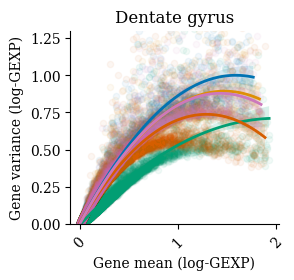


Run 1
Wasserstein distance true/generated CFGgen: 0.045449822916590416
Energy distance true/generated CFGgen: 0.06854269909448117

Wasserstein distance true/generated scDiffusion: 0.7394579492894512
Energy distance true/generated scDiffusion: 1.0135619946267869

Wasserstein distance true/generated scGAN: 0.03282271640138012
Energy distance true/generated scGAN: 0.06786780379262065

Wasserstein distance true/generated scVI: 0.03161526554217866
Energy distance true/generated scVI: 0.0599901429712342

Removed 171 obs from CFGgen
Removed 171 obs from Real data
Removed 171 obs from scDiffusion
Removed 171 obs from scGAN
Removed 171 obs from scVI



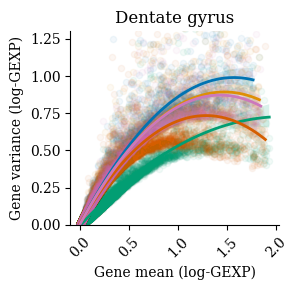


Run 2
Wasserstein distance true/generated CFGgen: 0.03882680012920085
Energy distance true/generated CFGgen: 0.056423271551181355

Wasserstein distance true/generated scDiffusion: 0.7499863788934655
Energy distance true/generated scDiffusion: 1.0192599494143721

Wasserstein distance true/generated scGAN: 0.032818819697027914
Energy distance true/generated scGAN: 0.06891085704929946

Wasserstein distance true/generated scVI: 0.03284619499652182
Energy distance true/generated scVI: 0.06191624142208891

Removed 171 obs from CFGgen
Removed 171 obs from Real data
Removed 171 obs from scDiffusion
Removed 171 obs from scGAN
Removed 171 obs from scVI



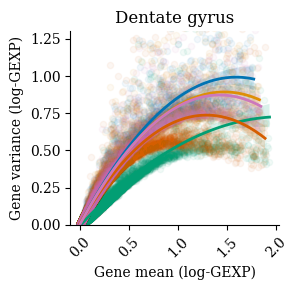

In [5]:
adata_real_dent = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/dentategyrus/dentategyrus_test.h5ad")
for i in range(3):
    print(f"Run {i}")
    adata_celldreamer_dent = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/dentategyrus/generated_cells_{i}.h5ad")
    adata_scDiff_dent = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scDiffusion/generated/dentategyrus/generated_cells_{i}.h5ad")
    adata_scgan_dent = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scgan/model_runs/dentategyrus/dentategyrus_generated_{i}.h5ad")
    adata_scvi_dent = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/dentategyrus/generated/dentategyrus_{i}.h5ad")
    plot_log_mean_vs_log_variance(adata_real_dent, 
                              {"CFGgen": adata_celldreamer_dent, 
                               "scDiffusion": adata_scDiff_dent,
                              "scGAN": adata_scgan_dent,
                              "scVI": adata_scvi_dent}, 
                              "Dentate gyrus", 
                              folder=folder,
                              xlim=None, ylim=(0,1.3), quantile=(0,0.99))
    print()

## Tabula Muris

Wasserstein distance true/generated cellFlow: 0.03424459555887033
Energy distance true/generated cellFlow: 0.034237862414967485

Wasserstein distance true/generated scDiffusion: 0.6450489713240642
Energy distance true/generated scDiffusion: 0.8704610280043421

Wasserstein distance true/generated scGAN: 1.6398637575300001
Energy distance true/generated scGAN: 1.6340744413379527

Wasserstein distance true/generated scVI: 0.06989253870955722
Energy distance true/generated scVI: 0.07931788147313407

Removed 0 obs from Real data
Removed 0 obs from cellFlow
Removed 0 obs from scDiffusion
Removed 0 obs from scGAN
Removed 0 obs from scVI



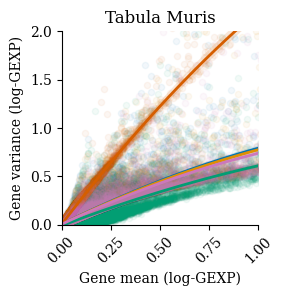

Wasserstein distance true/generated cellFlow: 0.03395039293581707
Energy distance true/generated cellFlow: 0.033546405516791174

Wasserstein distance true/generated scDiffusion: 0.6723094649667692
Energy distance true/generated scDiffusion: 0.8975053338509904

Wasserstein distance true/generated scGAN: 1.6422028728729585
Energy distance true/generated scGAN: 1.6356965453657866

Wasserstein distance true/generated scVI: 0.0694439697654587
Energy distance true/generated scVI: 0.07845079240549672

Removed 0 obs from Real data
Removed 0 obs from cellFlow
Removed 0 obs from scDiffusion
Removed 0 obs from scGAN
Removed 0 obs from scVI



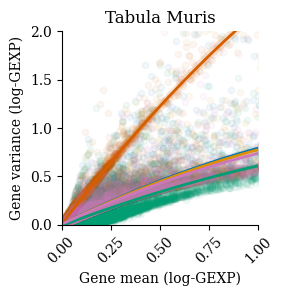

Wasserstein distance true/generated cellFlow: 0.03543737773527165
Energy distance true/generated cellFlow: 0.035540888706770885

Wasserstein distance true/generated scDiffusion: 0.6066594622917673
Energy distance true/generated scDiffusion: 0.8338717169781541

Wasserstein distance true/generated scGAN: 1.6425053379606145
Energy distance true/generated scGAN: 1.634971872614683

Wasserstein distance true/generated scVI: 0.07043553169426212
Energy distance true/generated scVI: 0.08050699132955519

Removed 0 obs from Real data
Removed 0 obs from cellFlow
Removed 0 obs from scDiffusion
Removed 0 obs from scGAN
Removed 0 obs from scVI



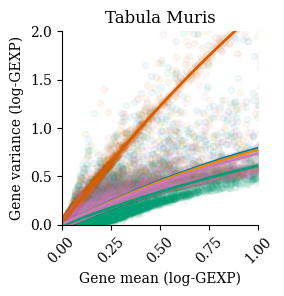

In [6]:
adata_real_tabula_muris = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/tabula_muris/tabula_muris_test.h5ad")
for i in range(3): 
    adata_celldreamer_tabula_muris = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/tabula_muris/generated_cells_{i}.h5ad")
    adata_scDiff_tabula_muris = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scDiffusion/generated/tabula_muris/generated_cells_{i}.h5ad")
    adata_scgan_tabula_muris = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scgan/model_runs/tabula_muris/tabula_muris_generated_{i}.h5ad")
    adata_scvi_tabula_muris = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/tabula_muris/generated/tabula_muris_{i}.h5ad")
    plot_log_mean_vs_log_variance(adata_real_tabula_muris, 
                              {"cellFlow": adata_celldreamer_tabula_muris,
                               "scDiffusion": adata_scDiff_tabula_muris, 
                              "scGAN": adata_scgan_tabula_muris, 
                              "scVI": adata_scvi_tabula_muris}, "Tabula Muris", 
                              folder=folder,
                              xlim=(0,1), ylim=(0,2), quantile=(0,1)
                             )

## PBMC3K

Wasserstein distance true/generated cellFlow: 0.12758314794152814
Energy distance true/generated cellFlow: 0.2245489671936969

Wasserstein distance true/generated scDiffusion: 1.0228680319542682
Energy distance true/generated scDiffusion: 1.209515503372849

Wasserstein distance true/generated scGAN: 0.4390389002489127
Energy distance true/generated scGAN: 0.6320538956561916

Wasserstein distance true/generated scVI: 0.029682790946490463
Energy distance true/generated scVI: 0.04969544273204282

Removed 429 obs from Real data
Removed 429 obs from cellFlow
Removed 429 obs from scDiffusion
Removed 429 obs from scGAN
Removed 429 obs from scVI



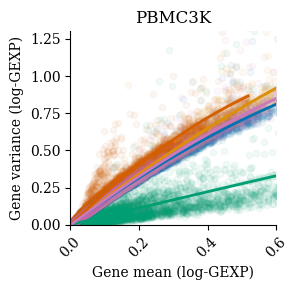

Wasserstein distance true/generated cellFlow: 0.15727260081356514
Energy distance true/generated cellFlow: 0.28692768055703965

Wasserstein distance true/generated scDiffusion: 1.0053883021657803
Energy distance true/generated scDiffusion: 1.1971665208851046

Wasserstein distance true/generated scGAN: 0.42385809064269553
Energy distance true/generated scGAN: 0.61129348499119

Wasserstein distance true/generated scVI: 0.04530663842359999
Energy distance true/generated scVI: 0.08434465572809935

Removed 429 obs from Real data
Removed 429 obs from cellFlow
Removed 429 obs from scDiffusion
Removed 429 obs from scGAN
Removed 429 obs from scVI



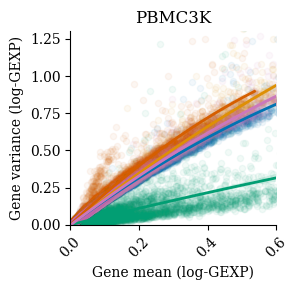

Wasserstein distance true/generated cellFlow: 0.123921737631373
Energy distance true/generated cellFlow: 0.2189313306282075

Wasserstein distance true/generated scDiffusion: 0.9865566067156216
Energy distance true/generated scDiffusion: 1.1822148569613387

Wasserstein distance true/generated scGAN: 0.4311568963568066
Energy distance true/generated scGAN: 0.6226023585793123

Wasserstein distance true/generated scVI: 0.036410300413144844
Energy distance true/generated scVI: 0.06439554216848555

Removed 429 obs from Real data
Removed 429 obs from cellFlow
Removed 429 obs from scDiffusion
Removed 429 obs from scGAN
Removed 429 obs from scVI



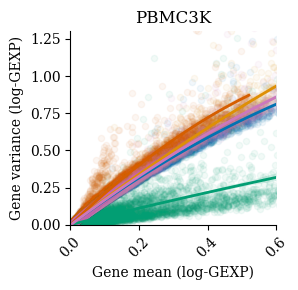

In [7]:
adata_real_pbmc3k = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/pbmc3k/pbmc3k_test.h5ad")
for i in range(3):
    adata_celldreamer_pbmc3k = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/pbmc3k/generated_cells_{i}.h5ad")
    adata_scDiff_pbmc3k = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scDiffusion/generated/pbmc3k/generated_cells_{i}.h5ad")
    adata_scgan_pbmc3k = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scgan/model_runs/pbmc3k/pbmc3k_generated_{i}.h5ad")
    adata_scvi_pbmc3k = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/pbmc3k/generated/pbmc3k_{i}.h5ad")
    plot_log_mean_vs_log_variance(adata_real_pbmc3k, 
                              {"cellFlow": adata_celldreamer_pbmc3k, "scDiffusion": adata_scDiff_pbmc3k,
                              "scGAN": adata_scgan_pbmc3k, "scVI": adata_scvi_pbmc3k}, "PBMC3K", 
                              folder=folder,
                              xlim=(0,0.60), ylim=(0,1.3), quantile=(0,0.95))

## HLCA CORE

Wasserstein distance true/generated cellFlow: 0.3961266285269091
Energy distance true/generated cellFlow: 0.631508907553102

Wasserstein distance true/generated scDiffusion: 1.2082556038342394
Energy distance true/generated scDiffusion: 1.3031464300362046

Wasserstein distance true/generated scGAN: 0.8081195812490749
Energy distance true/generated scGAN: 1.0489323747767834

Wasserstein distance true/generated scVI: 0.5216655133402754
Energy distance true/generated scVI: 0.7969424403494099

Removed 753 obs from Real data
Removed 753 obs from cellFlow
Removed 753 obs from scDiffusion
Removed 1398 obs from scGAN
Removed 753 obs from scVI



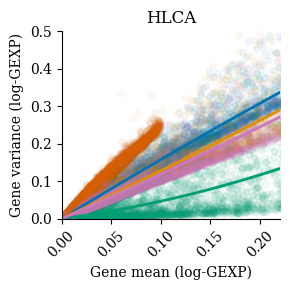

Wasserstein distance true/generated cellFlow: 0.3958608483085964
Energy distance true/generated cellFlow: 0.6309374996967351

Wasserstein distance true/generated scDiffusion: 1.267221264508202
Energy distance true/generated scDiffusion: 1.354457660473143

Wasserstein distance true/generated scGAN: 0.8097996054635686
Energy distance true/generated scGAN: 1.0512402435588741

Wasserstein distance true/generated scVI: 0.5227347050808075
Energy distance true/generated scVI: 0.7989106832985432

Removed 753 obs from Real data
Removed 753 obs from cellFlow
Removed 753 obs from scDiffusion
Removed 1398 obs from scGAN
Removed 753 obs from scVI



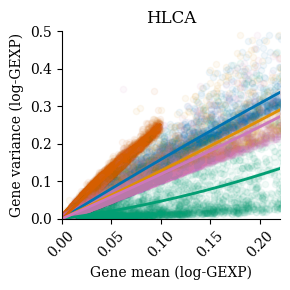

Wasserstein distance true/generated cellFlow: 0.3933852088499755
Energy distance true/generated cellFlow: 0.6270008322089993

Wasserstein distance true/generated scDiffusion: 1.3080239419401583
Energy distance true/generated scDiffusion: 1.3917428786401764

Wasserstein distance true/generated scGAN: 0.8102464315779694
Energy distance true/generated scGAN: 1.051345031493947

Wasserstein distance true/generated scVI: 0.5221285783336187
Energy distance true/generated scVI: 0.7975785990794064

Removed 753 obs from Real data
Removed 753 obs from cellFlow
Removed 753 obs from scDiffusion
Removed 1398 obs from scGAN
Removed 753 obs from scVI



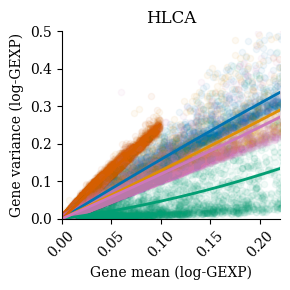

In [8]:
for i in range(3):
    adata_real_hlca = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/hlca_core/hlca_core_test.h5ad")

    adata_celldreamer_hlca = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/hlca_core/generated_cells_{i}.h5ad")
    adata_scDiff_hlca = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scDiffusion/generated/hlca_core/generated_cells_{i}.h5ad")
    adata_scgan_hlca = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scgan/model_runs/hlca_core/hlca_core_generated_{i}.h5ad")
    adata_scvi_hlca = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/hlca_core/generated/hlca_core_{i}.h5ad")

    adata_celldreamer_hlca.var = adata_real_hlca.var.copy()
    adata_scDiff_hlca.var = adata_real_hlca.var.copy()
    adata_scgan_hlca.var = adata_scgan_hlca.var.copy()
    adata_scvi_hlca.var = adata_real_hlca.var.copy()
    
    sc.pp.highly_variable_genes(adata_real_hlca, n_top_genes=15000, subset=True)

    adata_scDiff_hlca = adata_scDiff_hlca[:, adata_real_hlca.var.index]
    adata_celldreamer_hlca = adata_celldreamer_hlca[:, adata_real_hlca.var.index]
    adata_scgan_hlca = adata_scgan_hlca[:, adata_scgan_hlca.var.index]
    adata_scvi_hlca = adata_scvi_hlca[:, adata_real_hlca.var.index]

    plot_log_mean_vs_log_variance(adata_real_hlca, 
                                  {"cellFlow": adata_celldreamer_hlca, "scDiffusion": adata_scDiff_hlca, 
                                  "scGAN": adata_scgan_hlca, "scVI": adata_scvi_hlca}, "HLCA", 
                                  folder=folder,
                                  xlim=(0,0.22), ylim=(0,0.50), quantile=(0,0.95))

# Replot only scVI and CFGen

In [9]:
# from scipy.stats import wasserstein_distance
# from scipy.stats import energy_distance

### Dentategyrus

In [10]:
# data_dent_small = plot_log_mean_vs_log_variance(adata_real_dent, 
#                               {"cellFlow": adata_celldreamer_dent, 
#                               "scVI": adata_scvi_dent}, 
#                               "Dentate gyrus", 
#                               folder=folder,
#                               xlim=(1,2), ylim=(0.6,1.1), quantile=(0,0.99)
#                              )

In [11]:
# data_dent_small = pd.DataFrame(data_dent_small)
# data_dent_small_mean_var_trend = data_dent_small
# data_dent_small_mean_var_trend = data_dent_small_mean_var_trend.loc[:, ["Variance/Mean","Dataset"]]
# scvi_dent = data_dent_small_mean_var_trend.loc[data_dent_small_mean_var_trend.Dataset=="scVI", "Variance/Mean"].dropna()
# cfgen_dent = data_dent_small_mean_var_trend.loc[data_dent_small_mean_var_trend.Dataset=="cellFlow", "Variance/Mean"].dropna()
# real_dent = data_dent_small_mean_var_trend.loc[data_dent_small_mean_var_trend.Dataset=="Real data", "Variance/Mean"].dropna()

# print("Wasserstein distance scVI", wasserstein_distance(scvi_dent, real_dent))
# print("Energy distance scVI", energy_distance(scvi_dent, real_dent))
# print("Wasserstein distance CFGen", wasserstein_distance(cfgen_dent, real_dent))
# print("Energy CFGen", energy_distance(cfgen_dent, real_dent))

## Tabula Muris

In [12]:
# data_tabula_small = plot_log_mean_vs_log_variance(adata_real_tabula_muris, 
#                               {"cellFlow": adata_celldreamer_tabula_muris,
#                               "scVI": adata_scvi_tabula_muris}, "Tabula Muris", 
#                               folder=folder,
#                               xlim=(0.6,1), ylim=(0.5,0.9), quantile=(0,1)
#                              )

In [13]:
# data_tabula_small = pd.DataFrame(data_tabula_small)
# data_tabula_small_mean_var_trend = data_tabula_small
# data_tabula_small_mean_var_trend = data_tabula_small_mean_var_trend.loc[:, ["Variance/Mean","Dataset"]]
# scvi_tabula = data_tabula_small_mean_var_trend.loc[data_tabula_small_mean_var_trend.Dataset=="scVI", "Variance/Mean"].dropna()
# cfgen_tabula = data_tabula_small_mean_var_trend.loc[data_tabula_small_mean_var_trend.Dataset=="cellFlow", "Variance/Mean"].dropna()
# real_tabula = data_tabula_small_mean_var_trend.loc[data_tabula_small_mean_var_trend.Dataset=="Real data", "Variance/Mean"].dropna()

# print("Wasserstein distance scVI", wasserstein_distance(scvi_tabula, real_tabula))
# print("Energy distance scVI", energy_distance(scvi_tabula, real_tabula))
# print("Wasserstein distance CFGen", wasserstein_distance(cfgen_tabula, real_tabula))
# print("Energy CFGen", energy_distance(cfgen_tabula, real_tabula))

## HLCA

In [14]:
# data_hlca_small = plot_log_mean_vs_log_variance(adata_real_hlca, 
#                               {"cellFlow": adata_celldreamer_hlca, "scVI": adata_scvi_hlca}, "HLCA", 
#                               folder=folder,
#                               xlim=(0.15,0.22), ylim=(0,0.50), quantile=(0,1))

In [15]:
# data_hlca_small = pd.DataFrame(data_hlca_small)
# data_hlca_small_mean_var_trend = data_hlca_small
# data_hlca_small_mean_var_trend = data_hlca_small_mean_var_trend.loc[:, ["Variance/Mean","Dataset"]]
# scvi_hlca = data_hlca_small_mean_var_trend.loc[data_hlca_small_mean_var_trend.Dataset=="scVI", "Variance/Mean"].dropna()
# cfgen_hlca = data_hlca_small_mean_var_trend.loc[data_hlca_small_mean_var_trend.Dataset=="cellFlow", "Variance/Mean"].dropna()
# real_hlca = data_hlca_small_mean_var_trend.loc[data_hlca_small_mean_var_trend.Dataset=="Real data", "Variance/Mean"].dropna()

# print("Wasserstein distance scVI", wasserstein_distance(scvi_hlca, real_hlca))
# print("Energy distance scVI", energy_distance(scvi_hlca, real_hlca))
# print("Wasserstein distance CFGen", wasserstein_distance(cfgen_hlca, real_hlca))
# print("Energy CFGen", energy_distance(cfgen_hlca, real_hlca))

## PBMC3k

In [16]:
# data_pbmc_small = plot_log_mean_vs_log_variance(adata_real_pbmc3k, 
#                               {"cellFlow": adata_celldreamer_pbmc3k, "scVI": adata_scvi_pbmc3k}, "PBMC3K", 
#                               folder=folder,
#                               xlim=(0.3,0.6), ylim=(0.25,1), quantile=(0,1)
#                              )

In [17]:
# data_pbmc_small = pd.DataFrame(data_pbmc_small)
# data_pbmc_small_mean_var_trend = data_pbmc_small
# data_pbmc_small_mean_var_trend = data_pbmc_small_mean_var_trend.loc[:, ["Variance/Mean","Dataset"]]
# scvi_pbmc = data_pbmc_small_mean_var_trend.loc[data_pbmc_small_mean_var_trend.Dataset=="scVI", "Variance/Mean"].dropna()
# cfgen_pbmc = data_pbmc_small_mean_var_trend.loc[data_pbmc_small_mean_var_trend.Dataset=="cellFlow", "Variance/Mean"].dropna()
# real_pbmc = data_pbmc_small_mean_var_trend.loc[data_pbmc_small_mean_var_trend.Dataset=="Real data", "Variance/Mean"].dropna()

# print("Wasserstein distance scVI", wasserstein_distance(scvi_pbmc, real_pbmc))
# print("Energy distance scVI", energy_distance(scvi_pbmc, real_pbmc))
# print("Wasserstein distance CFGen", wasserstein_distance(cfgen_pbmc, real_pbmc))
# print("Energy CFGen", energy_distance(cfgen_pbmc, real_pbmc))